# 43. 상승장과 하락장을 구분하는 비법!! - 평균모멘텀스코어

[43강의](https://www.youtube.com/watch?v=ki73Ky08hMs) 를 파이썬으로 구현해보겠습니다.

## 설치

Pandas, Numpy가 있어야 합니다. 설치가 안되어있으시면 다음 셀을 실행시키세요.

In [1]:
import sys
!{sys.executable} -m pip install pandas numpy 2>&1 1>/dev/null

## 다운로드 (KOSPI)

* [stooq](http://stooq.com/) 에서 KOSPI 데이터를 받으시구요.
* [fred](https://fred.stlouisfed.org/series/INTDSRKRM193N) 에서 한국 기준 금리 데이터를 받으세요. (예금 금리보다 약간 낮다고 합니다.)

편의를 위해서 아래 셀들을 실행시키시면 저절로 다운받아 드립니다.

In [2]:
! ls "kospi.csv" > /dev/null || wget "https://stooq.com/q/d/l/?s=^kospi&i=m" -O "kospi.csv"

In [3]:
! ls "korea_rate.csv" > /dev/null || wget "https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=off&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=INTDSRKRM193N&scale=left&cosd=1964-01-01&coed=2018-11-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2009-06-01&line_index=1&transformation=lin&vintage_date=2019-02-16&revision_date=2019-02-16&nd=1964-01-01" -O korea_rate.csv

## Systerader79 전략 vs 주식몰빵

단순 12개월 절대모멘텀의 구조적 업그레이드
* 1-12개월 12개를 다 보자!
* "상승장" 수에 따라 주식비중을 선정!

Goal: KOSPI 데이터에 systrader79 전략을 구현해서 수익률, MDD 를 살펴보자.

파일들이 어떻게 생겼는지는 [40강의](https://www.youtube.com/watch?v=wcBYT6HUSaM) 노트북에서 알아봤으니 스킵하죠. 파일들 로딩해서 합칩니다.

In [4]:
import pandas as pd
import numpy as np
# 아래는 차트를 쓰기 위한 라이브러리들입니다.
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('legend',fontsize=20);

In [5]:
filepath = 'kospi.csv'
df = pd.read_csv(filepath)[['Date', 'Open', 'High', 'Low', 'Close']]
df.head()

,Date,Open,High,Low,Close
0,1980-01-31,100.00,106.87,100.00,105.89
1,1980-02-29,104.48,106.08,103.46,103.74
2,1980-03-31,103.96,107.22,102.76,105.00
3,1980-04-30,105.43,118.21,105.43,116.09
4,1980-05-30,116.54,119.36,109.47,116.43


In [6]:
filepath = 'korea_rate.csv'
df2 = pd.read_csv(filepath)
df2.head()

,DATE,INTDSRKRM193N
0,1964-01-01,10.22
1,1964-02-01,10.22
2,1964-03-01,10.50
3,1964-04-01,10.50
4,1964-05-01,10.50


In [7]:
df2['예금금리'] = df2['INTDSRKRM193N'] / 12
df2 = df2.loc[192:][['DATE', '예금금리']]
df2 = df2.reset_index(drop=True).rename({'DATE': 'Date'}, axis='columns')
df2.head()

,Date,예금금리
0,1980-01-01,1.75
1,1980-02-01,1.75
2,1980-03-01,1.75
3,1980-04-01,1.75
4,1980-05-01,1.75


In [8]:
df = df.loc[:466].join(df2['예금금리'])
df.head(n=15)

,Date,Open,High,Low,Close,예금금리
0,1980-01-31,100.00,106.87,100.00,105.89,1.750000
1,1980-02-29,104.48,106.08,103.46,103.74,1.750000
2,1980-03-31,103.96,107.22,102.76,105.00,1.750000
3,1980-04-30,105.43,118.21,105.43,116.09,1.750000
4,1980-05-30,116.54,119.36,109.47,116.43,1.750000
5,1980-06-30,116.77,116.77,111.65,112.62,1.666667
6,1980-07-31,112.05,112.75,109.82,112.71,1.666667
7,1980-08-29,112.28,113.81,106.99,112.65,1.666667
8,1980-09-30,112.55,113.72,109.52,110.35,1.500000
9,1980-10-31,109.85,111.71,105.71,105.71,1.500000


In [9]:
df.tail()

,Date,Open,High,Low,Close,예금금리
462,2018-07-31,2322.23,2327.46,2245.17,2295.26,0.041667
463,2018-08-31,2301.17,2322.88,2218.70,2322.88,0.041667
464,2018-09-28,2317.93,2356.62,2265.43,2343.07,0.041667
465,2018-10-31,2351.29,2351.62,1985.95,2029.69,0.041667
466,2018-11-30,2035.11,2136.74,2023.82,2096.86,0.041667


In [10]:
df['주식수익'] = (df['Open'].shift(-1) / df['Open'] -1) * 100
df['주식비중'] = (df['Open']
              .rolling(13)
              .apply(lambda x: sum([x[12] > x[i] for i in range(0, 12)]), raw=True) / 12)
df['예금비중'] = 1 - df['주식비중']
df['s79 수익률'] = df['주식비중'] * df['주식수익'] + df['예금비중'] * df['예금금리']
df['s79 자산'] = (df['s79 수익률'] / 100 + 1).cumprod()
df['s79 최대자산'] = df['s79 자산'].cummax()
df['s79 MDD'] = (df['s79 자산'] / df['s79 최대자산'] - 1)
df['stock 자산'] = (df['주식수익'] / 100 + 1).cumprod()
df['stock 최대자산'] = df['stock 자산'].cummax()
df['stock MDD'] = (df['stock 자산'] / df['stock 최대자산'] - 1)
df = df.loc[12:].reset_index(drop=True)
df.tail()

,Date,Open,High,Low,Close,예금금리,주식수익,주식비중,예금비중,s79 수익률,s79 자산,s79 최대자산,s79 MDD,stock 자산,stock 최대자산,stock MDD
450,2018-07-31,2322.23,2327.46,2245.17,2295.26,0.041667,-0.906887,0.000000,1.000000,0.041667,40.022526,45.82051,-0.126537,23.0117,25.7891,-0.107697
451,2018-08-31,2301.17,2322.88,2218.70,2322.88,0.041667,0.728325,0.000000,1.000000,0.041667,40.039202,45.82051,-0.126173,23.1793,25.7891,-0.101198
452,2018-09-28,2317.93,2356.62,2265.43,2343.07,0.041667,1.439215,0.083333,0.916667,0.158129,40.102515,45.82051,-0.124791,23.5129,25.7891,-0.088262
453,2018-10-31,2351.29,2351.62,1985.95,2029.69,0.041667,-13.447086,0.250000,0.750000,-3.330522,38.766893,45.82051,-0.153940,20.3511,25.7891,-0.210864
454,2018-11-30,2035.11,2136.74,2023.82,2096.86,0.041667,NaN,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


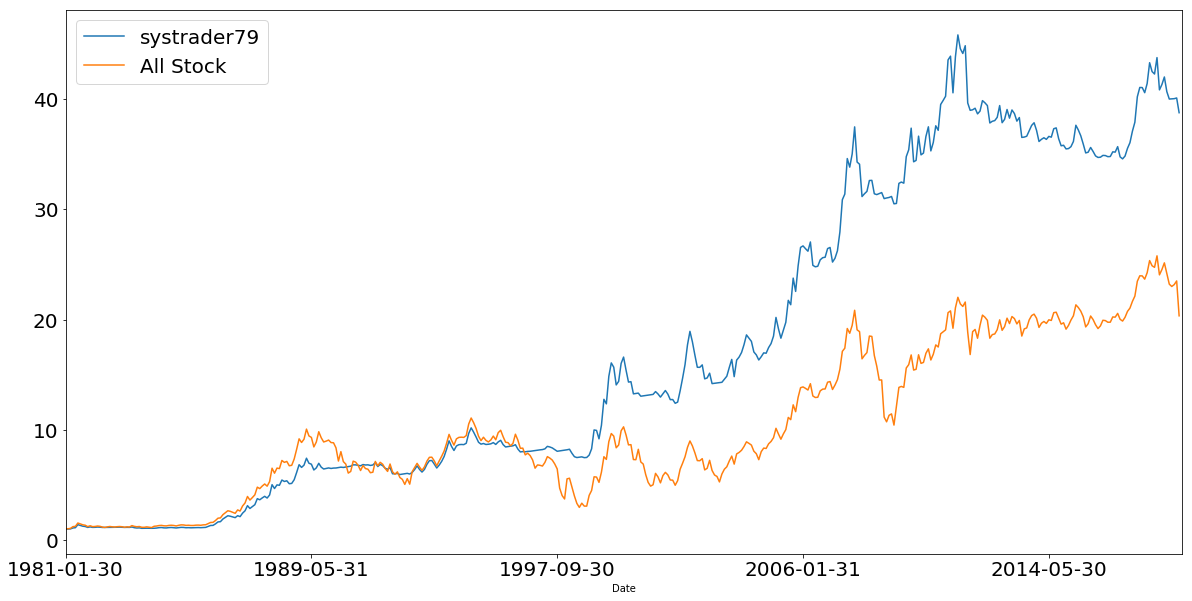

In [11]:
(df.set_index('Date')[['s79 자산', 'stock 자산']]
   .rename({'s79 자산': 'systrader79', 'stock 자산': 'All Stock'}, axis='columns')
   .plot(figsize=(20, 10), fontsize=20));

In [12]:
print('systrader79 MDD: {:.2f}'.format(df['s79 MDD'].min()))
print('all stock MDD: {:.2f}'.format(df['stock MDD'].min()))

systrader79 MDD: -0.26
all stock MDD: -0.73


결론:
* 평균모멘텀을 만들어내는 systrader79 전략은 좋다: 수익률, MDD 측면에서 주식몰빵보다 우월하다!
* 하지만, 매달 사고팔아야 하니 노력이며 수수료며 장난아닐꺼다!
* <span style="color:red">**MDD 가 적음은 하락장에서 우월하다는거지만, 2010년대를 보면 횡보장에 위약하다는 단점도**</span>

TODO:
* systrader79 는 매달 너무 많이 사고팔아야 함. systrader79 와 다른걸 섞어볼까?

## systrader79 vs systrader79 + 6개월전략 (11월 매수 + 4월 매도)

[40강의](40-nov-to-apr.ipynb) 에서 했던 6개월전략을 섞어서 더 좋아지는지 보죠. 

6개월은 아무짓도 안해도 되니 최소한 마음의 안정 + 수수료인하가 되겠죠.

In [13]:
df['월'] = df['Date'].apply(lambda d: int(d.split('-')[1]))
df['s79 + 6mon 수익률'] = np.where((df['월'] > 4) & (df['월'] < 11), df['예금금리'], df['s79 수익률'])
df['s79 + 6mon 자산'] = (df['s79 + 6mon 수익률'] / 100 + 1).cumprod()
df['s79 + 6mon 최대자산'] = df['s79 + 6mon 자산'].cummax()
df['s79 + 6mon MDD'] = (df['s79 + 6mon 자산'] / df['s79 + 6mon 최대자산'] - 1)
df.tail()

,Date,Open,High,Low,Close,예금금리,주식수익,주식비중,예금비중,s79 수익률,...,s79 최대자산,s79 MDD,stock 자산,stock 최대자산,stock MDD,월,s79 + 6mon 수익률,s79 + 6mon 자산,s79 + 6mon 최대자산,s79 + 6mon MDD
450,2018-07-31,2322.23,2327.46,2245.17,2295.26,0.041667,-0.906887,0.000000,1.000000,0.041667,...,45.82051,-0.126537,23.0117,25.7891,-0.107697,7,0.041667,32.650277,33.972296,-0.038915
451,2018-08-31,2301.17,2322.88,2218.70,2322.88,0.041667,0.728325,0.000000,1.000000,0.041667,...,45.82051,-0.126173,23.1793,25.7891,-0.101198,8,0.041667,32.663881,33.972296,-0.038514
452,2018-09-28,2317.93,2356.62,2265.43,2343.07,0.041667,1.439215,0.083333,0.916667,0.158129,...,45.82051,-0.124791,23.5129,25.7891,-0.088262,9,0.041667,32.677491,33.972296,-0.038114
453,2018-10-31,2351.29,2351.62,1985.95,2029.69,0.041667,-13.447086,0.250000,0.750000,-3.330522,...,45.82051,-0.153940,20.3511,25.7891,-0.210864,10,0.041667,32.691107,33.972296,-0.037713
454,2018-11-30,2035.11,2136.74,2023.82,2096.86,0.041667,NaN,0.000000,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN


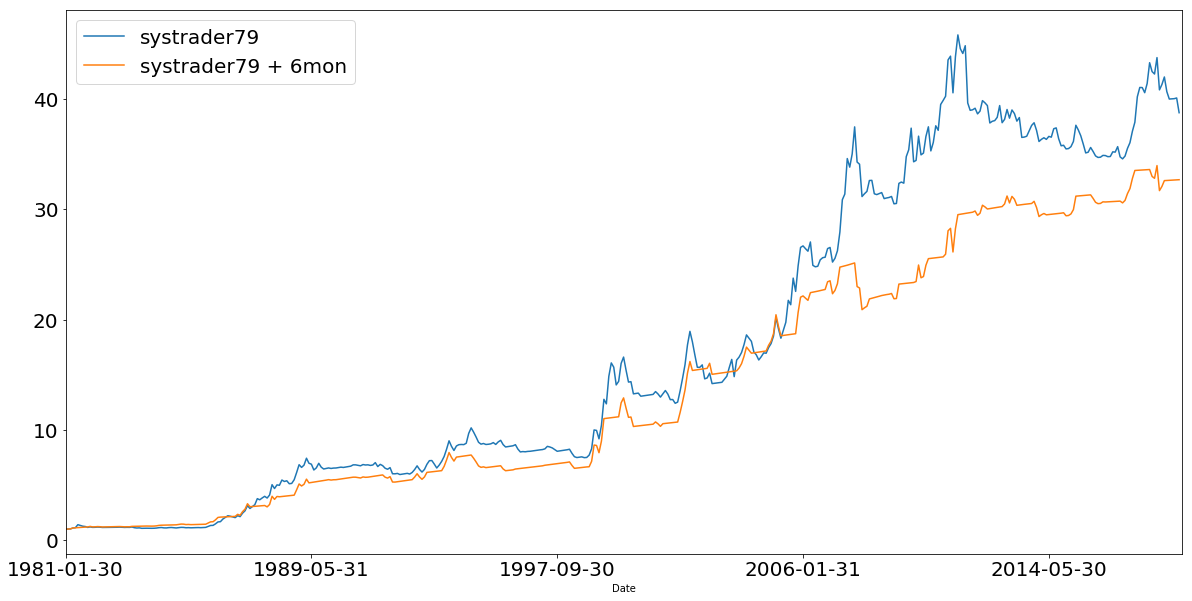

In [14]:
(df.set_index('Date')[['s79 자산', 's79 + 6mon 자산']]
   .rename({'s79 자산': 'systrader79', 's79 + 6mon 자산': 'systrader79 + 6mon'}, axis='columns')
   .plot(figsize=(20, 10), fontsize=20));

In [15]:
print('systrader79 MDD: {:.2f}'.format(df['s79 MDD'].min()))
print('systrader79 + 6mon MDD: {:.2f}'.format(df['s79 + 6mon MDD'].min()))

systrader79 MDD: -0.26
systrader79 + 6mon MDD: -0.21


결론:
* 자산: systrader79: 38배, systrader79+6개월: 32배
* 수수료: 1년에 6개월치 수수료 덜 내니 좋음
* MDD: 26% 에서 21% 로 줄어듬
* 최종: 최종자산은 조금 줄어들지만 MDD가 낮아서 좋음. 6개월 전략이 마음의 평화를 더 주니 이걸로 고고?

TODO:
* systrader79 전략에서 좋아지긴 했지만, 아직도 많이 사고팔아야 함. 모멘텀을 이용하되, 아주 조금 덜 사고파는 전략은 없나?

## systrader79 vs 모/도 전략 (12개의 모멘텀중 6개 이상이 좋을때만 주식보유, 아니면 현금 보유)

In [16]:
df['modo 수익률'] = np.where((df['주식비중'] > 0.5), df['주식수익'], df['예금금리'])
df['modo 자산'] = (df['modo 수익률'] / 100 + 1).cumprod()
df['modo 최대자산'] = df['modo 자산'].cummax()
df['modo MDD'] = (df['modo 자산'] / df['modo 최대자산'] - 1)
df.tail()

,Date,Open,High,Low,Close,예금금리,주식수익,주식비중,예금비중,s79 수익률,...,stock MDD,월,s79 + 6mon 수익률,s79 + 6mon 자산,s79 + 6mon 최대자산,s79 + 6mon MDD,modo 수익률,modo 자산,modo 최대자산,modo MDD
450,2018-07-31,2322.23,2327.46,2245.17,2295.26,0.041667,-0.906887,0.000000,1.000000,0.041667,...,-0.107697,7,0.041667,32.650277,33.972296,-0.038915,0.041667,63.789070,69.799712,-0.086113
451,2018-08-31,2301.17,2322.88,2218.70,2322.88,0.041667,0.728325,0.000000,1.000000,0.041667,...,-0.101198,8,0.041667,32.663881,33.972296,-0.038514,0.041667,63.815649,69.799712,-0.085732
452,2018-09-28,2317.93,2356.62,2265.43,2343.07,0.041667,1.439215,0.083333,0.916667,0.158129,...,-0.088262,9,0.041667,32.677491,33.972296,-0.038114,0.041667,63.842239,69.799712,-0.085351
453,2018-10-31,2351.29,2351.62,1985.95,2029.69,0.041667,-13.447086,0.250000,0.750000,-3.330522,...,-0.210864,10,0.041667,32.691107,33.972296,-0.037713,0.041667,63.868840,69.799712,-0.084970
454,2018-11-30,2035.11,2136.74,2023.82,2096.86,0.041667,NaN,0.000000,1.000000,NaN,...,NaN,11,NaN,NaN,NaN,NaN,0.041667,63.895452,69.799712,-0.084589


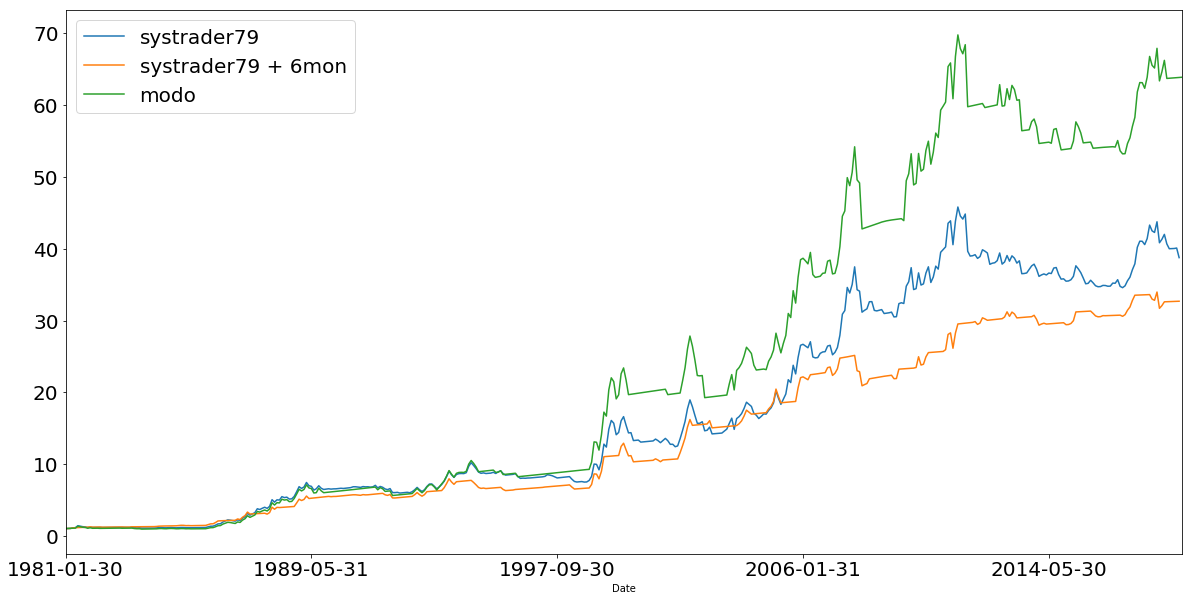

In [17]:
(df.set_index('Date')[['s79 자산', 's79 + 6mon 자산', 'modo 자산']]
   .rename({'s79 자산': 'systrader79', 's79 + 6mon 자산': 'systrader79 + 6mon', 'modo 자산': 'modo'}, axis='columns')
   .plot(figsize=(20, 10), fontsize=20));

In [18]:
print('systrader79 MDD: {:.2f}'.format(df['s79 MDD'].min()))
print('systrader79 + 6mon MDD: {:.2f}'.format(df['s79 + 6mon MDD'].min()))
print('modo MDD: {:.2f}'.format(df['modo MDD'].min()))

systrader79 MDD: -0.26
systrader79 + 6mon MDD: -0.21
modo MDD: -0.31


결론:
* 자산: systrader79: 38배, 모/도: 63배
* 수수료: 이것도 왕창 다 팔고 다 사고 하는거니 엄청날듯. 게다가, 매달...
* MDD: 26% 에서 31% 로 늘어남!

TODO:
* 모도에서 6개월까지 섞어볼까?

## systrader79 vs 모/도 + 6개월

In [19]:
df['modo + 6mon 수익률'] = np.where((df['주식비중'] > 0.5) & ((df['월'] <= 4) | (df['월'] >= 11)), df['주식수익'], df['예금금리'])
df['modo + 6mon 자산'] = (df['modo + 6mon 수익률'] / 100 + 1).cumprod()
df['modo + 6mon 최대자산'] = df['modo + 6mon 자산'].cummax()
df['modo + 6mon MDD'] = (df['modo + 6mon 자산'] / df['modo + 6mon 최대자산'] - 1)
df[['Date', '예금금리', '주식수익', '주식비중', 'modo + 6mon 수익률', 'modo + 6mon 자산', 'modo + 6mon MDD']].tail()

,Date,예금금리,주식수익,주식비중,modo + 6mon 수익률,modo + 6mon 자산,modo + 6mon MDD
450,2018-07-31,0.041667,-0.906887,0.000000,0.041667,45.661726,-0.023457
451,2018-08-31,0.041667,0.728325,0.000000,0.041667,45.680752,-0.023051
452,2018-09-28,0.041667,1.439215,0.083333,0.041667,45.699786,-0.022643
453,2018-10-31,0.041667,-13.447086,0.250000,0.041667,45.718827,-0.022236
454,2018-11-30,0.041667,NaN,0.000000,0.041667,45.737877,-0.021829


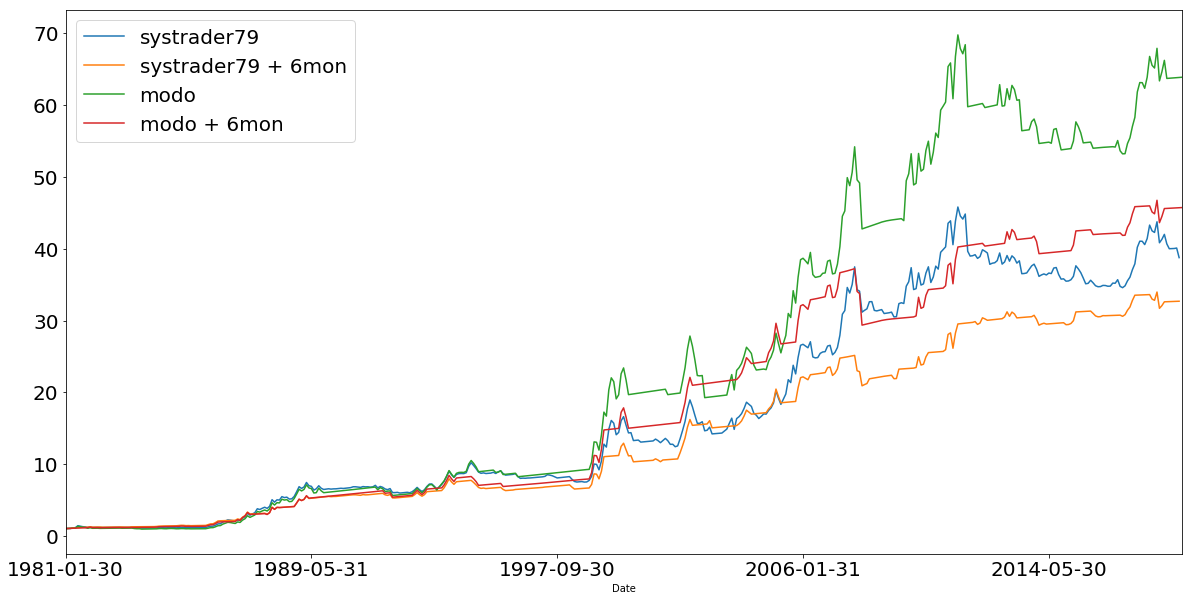

In [20]:
(df.set_index('Date')[['s79 자산', 's79 + 6mon 자산', 'modo 자산', 'modo + 6mon 자산']]
   .rename({'s79 자산': 'systrader79', 's79 + 6mon 자산': 'systrader79 + 6mon', 'modo 자산': 'modo', 'modo + 6mon 자산': 'modo + 6mon'}, axis='columns')
   .plot(figsize=(20, 10), fontsize=20));

In [21]:
print('systrader79 MDD: {:.2f}'.format(df['s79 MDD'].min()))
print('systrader79 + 6mon MDD: {:.2f}'.format(df['s79 + 6mon MDD'].min()))
print('modo MDD: {:.2f}'.format(df['modo MDD'].min()))
print('modo + 6mon MDD: {:.2f}'.format(df['modo + 6mon MDD'].min()))

systrader79 MDD: -0.26
systrader79 + 6mon MDD: -0.21
modo MDD: -0.31
modo + 6mon MDD: -0.21


결론:
* 자산: 42배... 그럭저럭 2nd best
* 수수료: 이게 아마 가장 적게 낼 듯
* MDD: 21%로 젤 적음
    
진짜 결론: 이것저것 다 합친게 짱이다!

## 스킵

* [AQR Data library](https://www.aqr.com/Insights/Datasets/Quality-Minus-Junk-Factors-Monthly) 에서 세계 데이터 받아서 분석하는건 스킵
* 너무 길어짐...  [40강의](40-nov-to-apr.ipynb) 보고 따라하세요.

## 결론

* 왜, 이런 모멘텀 전략이 통해? <span style="color:red">**연초애 애널들이 기업실적 긍정적 예측, 연말에 실적이 미달하면서 실망해서 빠진다?**</span>

## 돌아보기

* [32강의](32-dividend-happy-korea.ipynb) 의 마지막에 중요한것을 두개 말씀하심: (1) 11월 매수, 4월 매도, (2) 모멘텀을 보고 매수/매도시기 약간 조정
* [40강의](40-nov-to-apr.ipynb) 에서 11월 매수/4월 매도가 먹힘을 데이터로 알아봄
* 이번 강의에서 모멘텀을 보고 잘 사고파는게 중요하다는 것을 알게 됨

## TODO

* 이번에 12개 모멘텀 평균낸거 기억해서 꼭 써먹자!